In [1]:
from importlib import reload

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
import src.tm_roller; reload(src.tm_roller)
import src.bsln_kde;reload(src.bsln_kde)
import src.bsln_bower;reload(src.bsln_bower)

from src.data_prep import prep_911, prep_data_from_raw
from src.spatial_unit import baltimore_grids
from src import eval_metric
from src.tm_roller import TM_ROLLER
from src.bsln_kde import KDE
from src.bsln_bower import Bower
from src.bsln_rtm import RTM

In [5]:
crimes = prep_data_from_raw('data/open-baltimore/raw/BPD_Part_1_Victim_Based_Crime_Data.csv', 
                 col_lon='Longitude', col_lat='Latitude', col_date='CrimeDate', to_epsg=3559)

In [6]:
d911 = prep_911()

In [7]:
tune_sd = '2013-01-01'
tune_ed = '2013-12-31'
train_tw = 60
vstep = 1
vtw = 1
vsd = '2015-03-02'
ved = '2015-03-10'
grid_size=200

In [8]:
crimes.index[0].strftime('%Y-%m-%d')

'2013-01-01'

In [9]:
grids = baltimore_grids(grid_size=grid_size)

# for each tune period

In [10]:
metrics = [
    eval_metric.hit_rate_auc, eval_metric.search_efficient_rate_auc,
    eval_metric.prediction_accuracy_index_auc, eval_metric.area_to_perimeter_ratio_auc,
    eval_metric.hit_rate_bin, eval_metric.search_efficient_rate_bin,
    eval_metric.prediction_accuracy_index_bin, eval_metric.area_to_perimeter_ratio_bin,
]

In [11]:
# method.tune(data.loc[tune_sd:tune_ed].coords, cv=10, bw_choice=[10, 100, 200, 300, 400, 500], n_jobs=4)

In [12]:
verbose = 0
bower = Bower(grid_size, bw=400, tw=train_tw, verbose=verbose)
print(bower)
tmroller_bower = TM_ROLLER(bower, crimes.Coords, crimes.Coords, vsd, ved, roll_step=vstep, eval_tw=vtw, verbose=verbose)
res_bower = tmroller_bower.eval(metrics, grids)

Bower method: weighted by distance and time, bandwidth=400, time window=60, verbose=0
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10


In [13]:
verbose = 0
# method = KDE(verbose=1, bw=400)
kde = KDE(bw=400, tw=train_tw, verbose=verbose)
print(kde)
tmroller_kde = TM_ROLLER(kde, crimes.Coords, crimes.Coords, vsd, ved, roll_step=vstep, eval_tw=vtw, verbose=verbose)
res_kde = tmroller_kde.eval(metrics, grids)

KDE(bandwidth=400, timewindow=60, verbose=0)
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10


In [14]:
verbose=0
rtm = RTM(grid_size=grid_size, bw=400, tw=train_tw, verbose=verbose)
print(rtm)
tmroller_rtm = TM_ROLLER(rtm, d911, crimes.Coords, vsd, ved, roll_step=vstep, eval_tw=vtw, verbose=verbose)
res_rtm = tmroller_rtm.eval(metrics, grids)

RTM with bandwidth=400 meters, grid size=200 meters, time window=60 days
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10
5991 10


hit_rate_bin ['hit_rate_auc', 'search_efficient_rate_auc', 'prediction_accuracy_index_auc', 'area_to_perimeter_ratio_auc', 'hit_rate_bin', 'search_efficient_rate_bin', 'prediction_accuracy_index_bin', 'area_to_perimeter_ratio_bin']


,2015-03-02~2015-03-02,2015-03-03~2015-03-03,2015-03-04~2015-03-04,2015-03-05~2015-03-05,2015-03-06~2015-03-06,2015-03-07~2015-03-07,2015-03-08~2015-03-08,2015-03-09~2015-03-09,2015-03-10~2015-03-10
bin>=1,0.093333,0.058824,0.157895,0.111111,0.134831,0.160494,0.080808,0.102273,0.140351
bin>=2,0.306667,0.264706,0.326316,0.296296,0.370787,0.308642,0.353535,0.272727,0.307018
bin>=3,0.560000,0.509804,0.547368,0.592593,0.595506,0.518519,0.525253,0.500000,0.578947
bin>=4,0.733333,0.715686,0.715789,0.833333,0.764045,0.802469,0.707071,0.784091,0.754386
bin>=5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


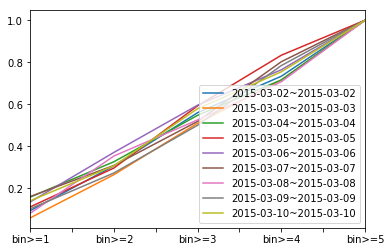

In [16]:
keys = list(res_rtm.keys())
i= 4
print(keys[i], keys)
res_rtm[keys[i]].plot()
res_rtm[keys[i]]

['hit_rate_auc', 'search_efficient_rate_auc', 'prediction_accuracy_index_auc', 'area_to_perimeter_ratio_auc', 'hit_rate_bin', 'search_efficient_rate_bin', 'prediction_accuracy_index_bin', 'area_to_perimeter_ratio_bin'] prediction_accuracy_index_bin


,2015-03-02~2015-03-02,2015-03-03~2015-03-03,2015-03-04~2015-03-04,2015-03-05~2015-03-05,2015-03-06~2015-03-06,2015-03-07~2015-03-07,2015-03-08~2015-03-08,2015-03-09~2015-03-09,2015-03-10~2015-03-10
bin>=1,0.000000,4.195378,14.014035,5.042929,14.023876,6.163580,7.564394,14.588474,8.758772
bin>=2,6.656667,6.407487,11.188625,3.522046,9.221179,8.805115,3.782197,7.091619,9.652524
bin>=3,2.912292,6.221959,5.505514,5.763348,6.397669,8.117886,5.134619,6.465655,6.644586
bin>=4,3.307134,3.256938,3.019599,3.444183,3.371861,3.281633,3.761208,3.831316,3.468239
bin>=5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


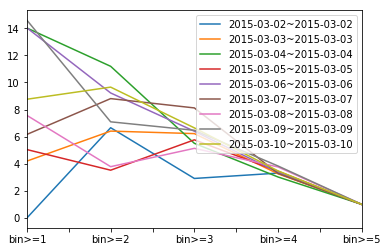

In [23]:
keys = list(res_bower.keys())
i= 6
print(keys, keys[i])
res_bower[keys[i]].plot()
res_bower[keys[i]]

['hit_rate_auc', 'search_efficient_rate_auc', 'prediction_accuracy_index_auc', 'area_to_perimeter_ratio_auc', 'hit_rate_bin', 'search_efficient_rate_bin', 'prediction_accuracy_index_bin', 'area_to_perimeter_ratio_bin'] area_to_perimeter_ratio_bin


,2015-03-02~2015-03-02,2015-03-03~2015-03-03,2015-03-04~2015-03-04,2015-03-05~2015-03-05,2015-03-06~2015-03-06,2015-03-07~2015-03-07,2015-03-08~2015-03-08,2015-03-09~2015-03-09,2015-03-10~2015-03-10
bin>=1,179.166667,175.000000,178.260870,185.714286,184.210526,163.157895,168.421053,173.684211,173.684211
bin>=2,278.723404,267.346939,260.784314,262.000000,248.000000,255.000000,257.500000,256.818182,256.818182
bin>=3,549.056604,551.428571,552.380952,544.859813,553.398058,512.500000,520.388350,539.215686,542.156863
bin>=4,655.133080,662.977099,669.260700,660.231660,646.360153,655.510204,647.600000,639.525692,655.284553
bin>=5,3423.428571,3423.428571,3423.428571,3423.428571,3423.428571,3423.428571,3423.428571,3423.428571,3423.428571


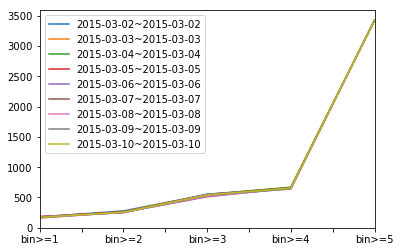

In [28]:
keys = list(res_kde.keys())
i= 7
print(keys, keys[i])
res_kde[keys[i]].plot()
res_kde[keys[i]]

In [44]:
# Bower method: weighted by distance and time, bandwidth=400, time window=60, verbose=1
df

,2014-03-02~2014-03-02,2014-03-03~2014-03-03,2014-03-04~2014-03-04,2014-03-05~2014-03-05,2014-03-06~2014-03-06,2014-03-07~2014-03-07,2014-03-08~2014-03-08,2014-03-09~2014-03-09,2014-03-10~2014-03-10
10%,0.470588,0.438596,0.432990,0.398058,0.411215,0.422018,0.519231,0.397849,0.435115
20%,0.717647,0.631579,0.711340,0.533981,0.523364,0.669725,0.625000,0.602151,0.625954
30%,0.811765,0.736842,0.793814,0.640777,0.663551,0.798165,0.711538,0.795699,0.709924
40%,0.858824,0.877193,0.855670,0.825243,0.785047,0.899083,0.836538,0.913978,0.847328
50%,0.976471,0.929825,0.907216,0.883495,0.906542,0.944954,0.923077,0.956989,0.923664
60%,0.988235,0.964912,0.948454,0.951456,0.953271,0.972477,0.942308,1.000000,0.992366
70%,1.000000,0.964912,0.969072,0.990291,0.990654,1.000000,0.961538,1.000000,1.000000
80%,1.000000,0.982456,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,1.000000,0.982456,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
